# LOAN APPROVAL PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
tr=pd.read_csv(r'E:/loan_pred/train.csv')
te=pd.read_csv(r'E:/loan_pred/test.csv')

In [3]:
print(tr.shape)
print(te.shape)
test=te

(614, 13)
(367, 12)


In [4]:
tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
tr.select_dtypes(include='object').describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002317,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
null=((tr.isnull().sum())/len(tr))*100
print(null)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


As we can observe the most columns have non-null values. The columns Self-Employed ,Gender,Loan Amount Term ,Credit History however contain null values which need to be dealt with.

In [8]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


The dataset contains 13 attributes. We have to train our model for the Loan Status column based on other 12 dimensions of the dataset.

# Univariate Analysis

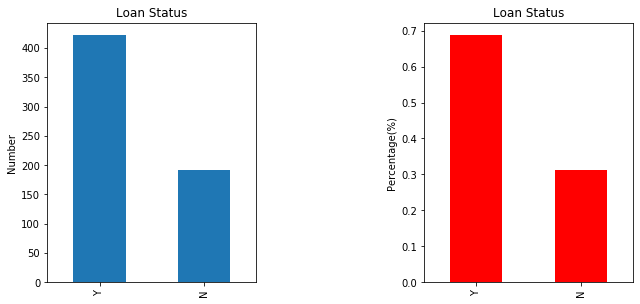

In [10]:
fig=plt.figure()
plt.subplot(221)
tr['Loan_Status'].value_counts().plot.bar()
plt.ylabel('Number')
plt.title('Loan Status')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Loan_Status'].value_counts(normalize=True).plot.bar(color='Red')
plt.ylabel('Percentage(%)')
_=plt.title('Loan Status')

Here, from the above graphs we can infer that approx 70% of the loans are approved

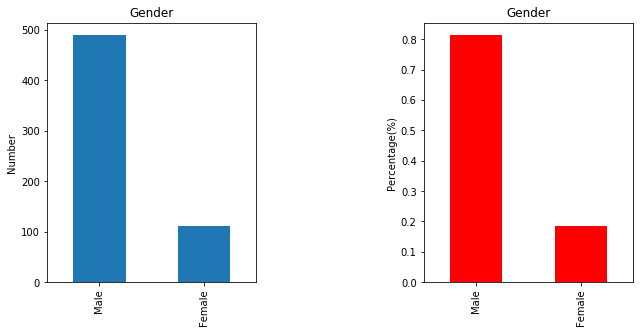

In [11]:
fig=plt.figure()
plt.subplot(221)
tr['Gender'].value_counts().plot.bar()
plt.ylabel('Number')
plt.title('Gender')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Gender'].value_counts(normalize=True).plot.bar(color='Red')
plt.ylabel('Percentage(%)')
_=plt.title('Gender')

We can infer from above graphs that most of the Loan applicants are male. Females comprise less than 20% of the applicants.

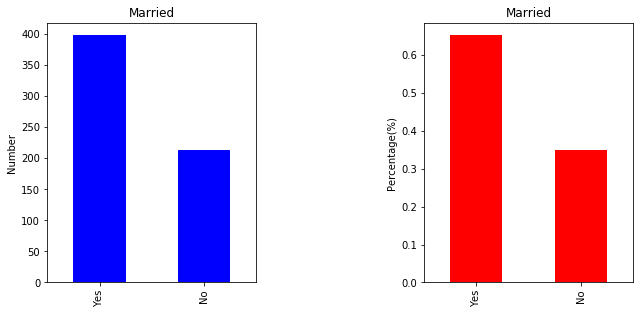

In [12]:
fig=plt.figure()
plt.subplot(221)
tr['Married'].value_counts().plot.bar(color='blue')
plt.ylabel('Number')
plt.title('Married')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Married'].value_counts(normalize=True).plot.bar(color='red')
plt.ylabel('Percentage(%)')

_=plt.title('Married')

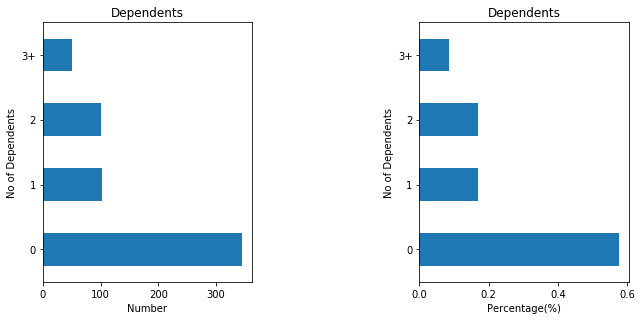

In [13]:
fig=plt.figure()
plt.subplot(221)
tr['Dependents'].value_counts().plot.barh()
plt.xlabel('Number')
plt.ylabel('No of Dependents')
plt.title('Dependents')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Dependents'].value_counts(normalize=True).plot.barh()
plt.xlabel('Percentage(%)')
plt.ylabel('No of Dependents')
_=plt.title('Dependents')

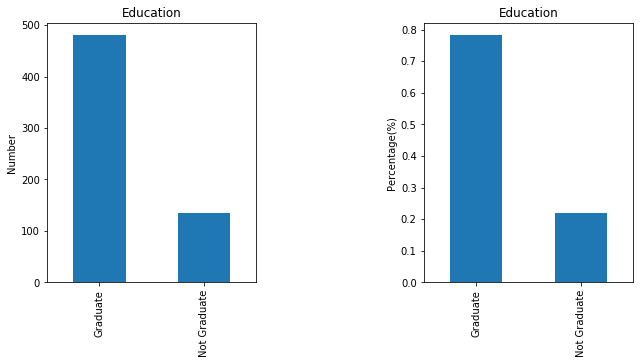

In [14]:
fig=plt.figure()
plt.subplot(221)
tr['Education'].value_counts().plot.bar()
plt.ylabel('Number')
_=plt.title('Education')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Education'].value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage(%)')
_=plt.title('Education')

Majority of the applicants are Graduate and about 25% are not graduate.Banks consider this an important factor for decision making as a graduate person better understands the procedure and terms and condition  while it is difficult for non graduate person to understand all formalities and terms of repayment easily.

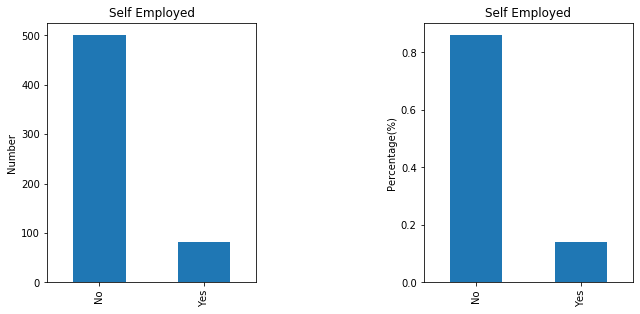

In [15]:
fig=plt.figure()
plt.subplot(221)
tr['Self_Employed'].value_counts().plot.bar()
plt.ylabel('Number')
plt.title('Self Employed')
fig.set_size_inches(10.5, 10.5)
plt.subplot(222)
plt.subplots_adjust(wspace=0.8)
tr['Self_Employed'].value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage(%)')
_=plt.title('Self Employed')

Less than 20% of loan applicants are self employed.

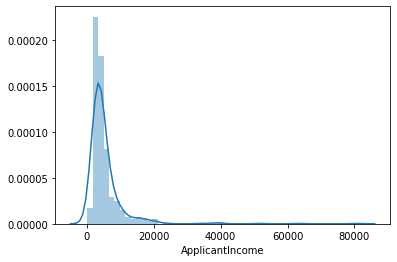

In [16]:
_=sns.distplot(tr['ApplicantIncome'])

Distribution of is Applicant Income is negatively skewed.It has a long right tail.Bank considers it the most important factor for loan approval as a person with higher income will be able to repay the loan amount easily compared to person with unstable and lower income.

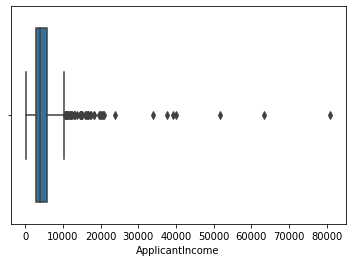

In [17]:
_=sns.boxplot(tr['ApplicantIncome'])

A box plot show the data points around the middle 50% of the distribution. As we can see many points lie outside upper wedge.But,all these points can't be classified as outliers beacause it among all appicants some can have very high income above the median income.

In [18]:
tr.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [19]:
n=tr.ApplicantIncome[tr['ApplicantIncome']>np.percentile(tr['ApplicantIncome'],99)]

Here we extract the top 1 percentile of ApplicantIncome and plot to check their distibution

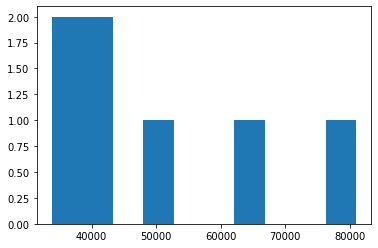

In [20]:
_=plt.hist(n)

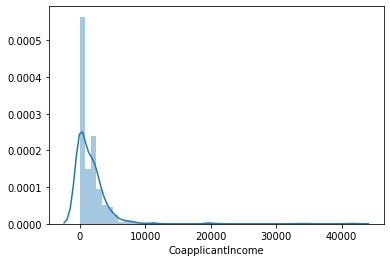

In [21]:
_=sns.distplot(tr['CoapplicantIncome'])

Distribution of Coapplicant income is also negatively skewed due to majority of them having zero income.

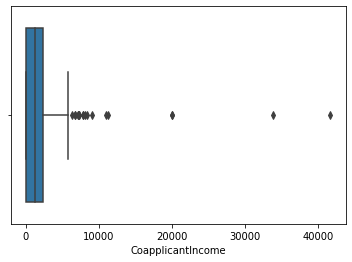

In [22]:
_=sns.boxplot(tr['CoapplicantIncome'])

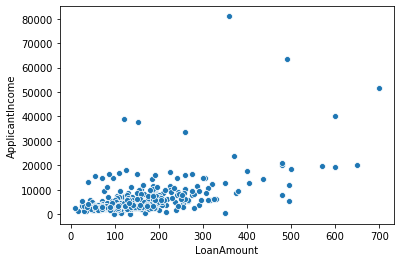

In [23]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=tr)

In [24]:
tr['LoanAmount'].fillna(tr['LoanAmount'].median(),inplace=True)
te['LoanAmount'].fillna(te['LoanAmount'].median(),inplace=True)

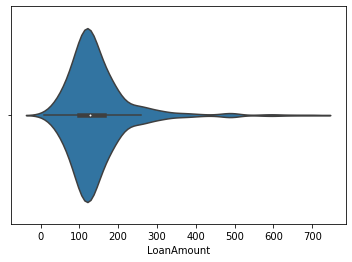

In [25]:
_=sns.violinplot(tr['LoanAmount'])

In [26]:
tr['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
tr['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Bivariate Analysis

Bivariate analysis refers to the analysis of two variables to determine relationships between them.Bivariate analyses are conducted to determine whether a statistical association exists between two variables, the degree of association if one does exist, and whether one variable may be predicted from another.

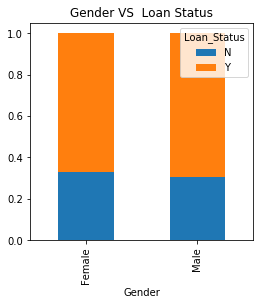

In [28]:
a=pd.crosstab(tr['Gender'],tr['Loan_Status'])
_=a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
_=plt.title('Gender VS  Loan Status')

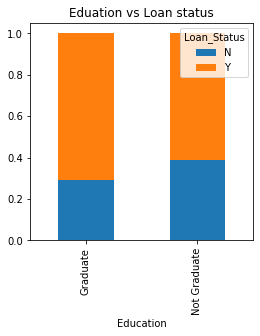

In [29]:
a=pd.crosstab(tr['Education'],tr['Loan_Status'])
a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
_=plt.title('Eduation vs Loan status')

We can see that Education should be considered in model for decision of loan approval as it can be observed from the data that graduates have more chance of getting loan approved than the non graudate ones.

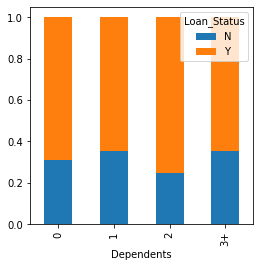

In [30]:
a=pd.crosstab(tr['Dependents'],tr['Loan_Status'])
_=a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

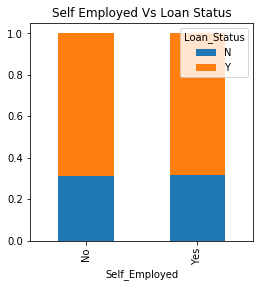

In [31]:
a=pd.crosstab(tr['Self_Employed'],tr['Loan_Status'])
_=a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
_=plt.title('Self Employed Vs Loan Status')

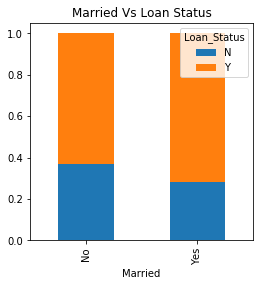

In [64]:
a=pd.crosstab(tr['Married'],tr['Loan_Status'])
_=a.div(a.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
_=plt.title('Married Vs Loan Status')

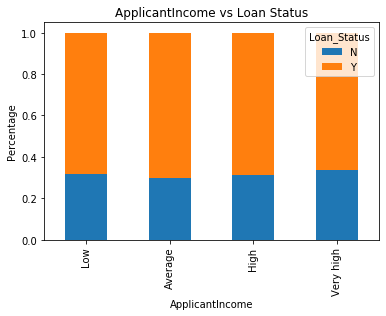

In [32]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
tr['Income_bin']=pd.cut(tr['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(tr['Income_bin'],tr['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')
_=plt.title('ApplicantIncome vs Loan Status')

The applicant income has been divided into vaious bins for numerical vas categorical analysis.We can see that as we move to upper section Loan approval chances increases slightly.

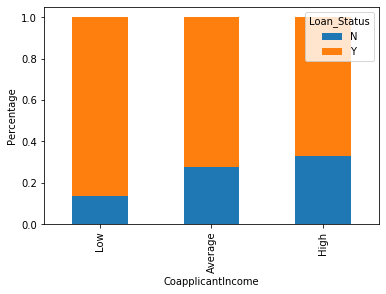

In [33]:
bins=[0,1000,3000,42000]
train=tr
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(tr['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

The coapplicant income has been divided into vaious bins for numerical vas categorical analysis.We can see that as we move to upper section Loan approval chances increases sharply. It is an important factor to consider for the model.

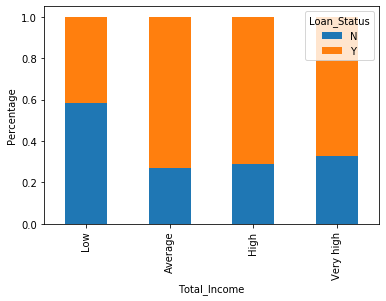

In [34]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Here,we combine the two income factors and bin them into four categories. The new feature is called Total income. Low Income has lowest possibility of getting loans.In low cateogory 60% are denied loans. Chances of loan approval increase with total income.

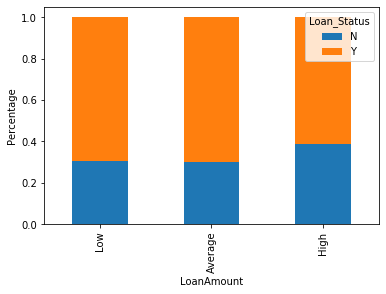

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(tr['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Applicants with higher Loan amount tend to have more loan approvals

In [36]:
train=train.drop([ 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)


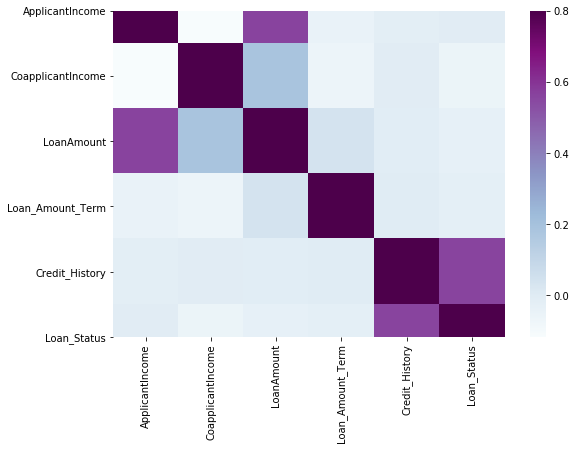

In [37]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing values and outlier treatment

In [38]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [39]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [40]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
train['Loan_Amount_Term'].fillna(360,inplace=True)

In [42]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [43]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

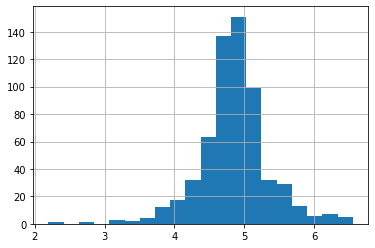

In [44]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])


In [45]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)
X = train.drop('Loan_Status',1) 
y = train.Loan_Status
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [46]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,1,0,0,0,1,0,1,0,0
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8

In [50]:
from sklearn.model_selection import StratifiedKFold
i=1 
avg_score=0
kf =StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))    
    xtr,xvl = X.loc[train_index],X.loc[test_index]    
    ytr,yvl = y[train_index],y[test_index]        
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)  
    avg_score=score+avg_score
    print('accuracy_score',score)    
    i+=1
    
    pred=model.predict_proba(xvl)[:,1]
print("\naverage score:"+str(avg_score/5))       
   


1 of kfold 5
accuracy_score 0.8145161290322581

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.8032786885245902

5 of kfold 5
accuracy_score 0.8442622950819673

average score:0.8159968270756215


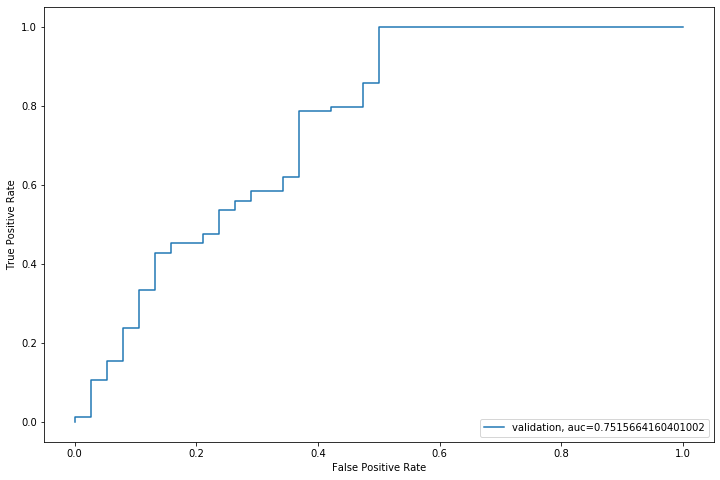

In [51]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()


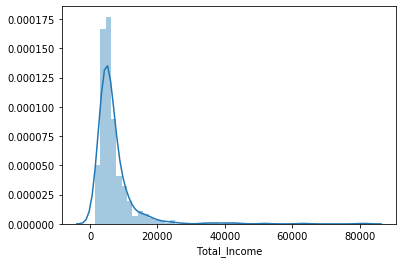

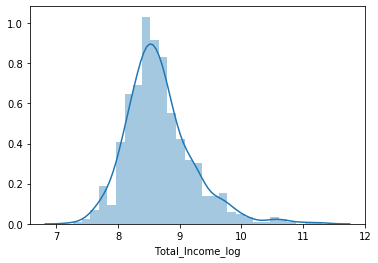

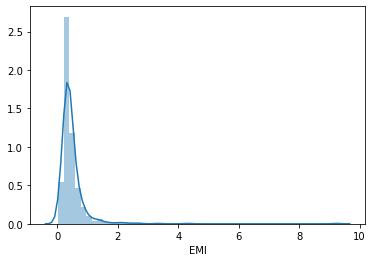

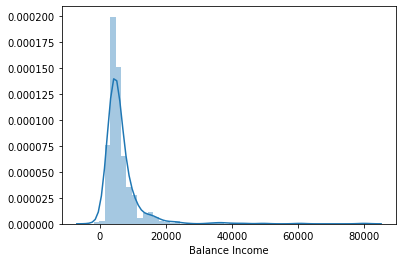

In [52]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])
plt.show()
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log'])
plt.show()
test['Total_Income_log'] = np.log(test['Total_Income'])
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])
plt.show()
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])
plt.show()

In [53]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [54]:
y=train['Loan_Status']
X=train.drop(['Loan_Status'],axis=1)

In [55]:
from sklearn.tree import DecisionTreeClassifier
i=1 
avg_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    avg_score=score+avg_score
    print('accuracy_score',score)     
    i+=1 
print("\naverage score:"+str(avg_score/5))  


1 of kfold 5
accuracy_score 0.7419354838709677

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.6311475409836066

4 of kfold 5
accuracy_score 0.6639344262295082

5 of kfold 5
accuracy_score 0.7213114754098361

average score:0.7000528820729773


In [56]:
i=1
avg_score=0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model =LogisticRegression()     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    avg_score=score+avg_score
    print('accuracy_score',score)     
    i+=1 
print("\naverage score:"+str(avg_score/5))   


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918

average score:0.8094658910629298
